In [1]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
import joblib
import matplotlib.pyplot as plt

In [2]:
train_features, train_labels = joblib.load('train_features.pkl')
val_features, val_labels = joblib.load('val_features.pkl')

train_X, val_X, train_y, val_y = train_features, val_features, train_labels, val_labels

In [3]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)

KNeighborsClassifier()

In [4]:
prob = model.predict_proba(val_X)
pred = model.predict(val_X)

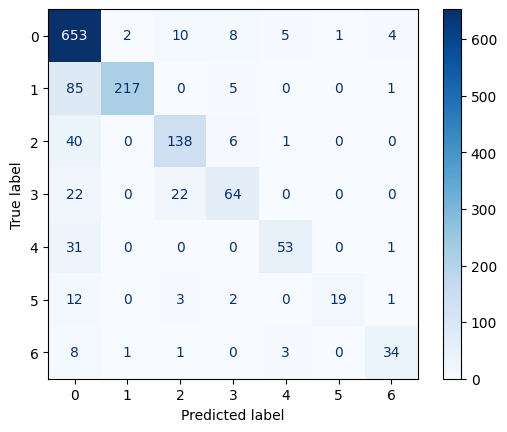

In [5]:
mcm = sklearn.metrics.confusion_matrix(val_y, pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=mcm,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [6]:
f1_score = sklearn.metrics.f1_score(val_y, pred, average='weighted')
print(f1_score)

0.8057704018848393


In [7]:
roc_auc_score = sklearn.metrics.roc_auc_score(val_y, prob, average='macro', multi_class='ovo')
print(roc_auc_score)

0.913908481357685


In [8]:
from sklearn.metrics import classification_report

print(classification_report(pred, val_y))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       851
           1       0.70      0.99      0.82       220
           2       0.75      0.79      0.77       174
           3       0.59      0.75      0.66        85
           4       0.62      0.85      0.72        62
           5       0.51      0.95      0.67        20
           6       0.72      0.83      0.77        41

    accuracy                           0.81      1453
   macro avg       0.69      0.85      0.75      1453
weighted avg       0.84      0.81      0.82      1453



In [9]:
import pickle

with open("models\\KNN.pkl", "wb") as f:
    pickle.dump(model, f)